<style>
    div {
        overflow : hidden;
        width : 90%;
        height : 100%;
        margin : auto;
        padding : 5px 0 20px;
        background-color : wheat;
        color : black ;
    }
    
    h2 {
        text-align : center;
    }

    p, ul {
        text-align : justify;
    }

    p {
        text-indent : 25px ;
    }
</style>

<div>
    <h2>BASIC PROBLEM AND ALGORITHM</h2>
    <p>Dimisalkan saya mempunyai food delivery dataset, yang akan digunakan untuk mengukur frekuensi order sebuah restoran berdasarkan hari dan waktu, maka algoritma untuk menentukannya adalah :</p>
    <ul>
        <li>Import dataset.</li>
        <li>Gunakan kolom resto_id, date_time, dan status.</li>
        <li>Ubah kolom date_time ke bentuk days dan time.</li>
        <li>Cleaning data dengan status completed.</li>
        <li>Visualisasi data.</li>
    </ul>
</div>

## 1. Import library and dataset

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [36]:
PATH_DATA = '../dataset/'

In [37]:
df = pd.read_csv(PATH_DATA+'food_delivery_datasets.csv')

## 2. Declare the variables

In [38]:
df

,order_id,voucher_amount,date_time,eta_seconds,food_price,cust_id,rating,delivery_fee,resto_id,status,random_id
0,FOOD-10455,0,2018-08-12T20:35:08.001006,1800,18900,1089034,5.0,4000,742638033,Completed,0.511149
1,FOOD-10985,0,2018-09-23T17:44:12.243273,2173,149000,180146,5.0,11000,742767245,Completed,0.832936
2,FOOD-10911,0,2018-09-19T18:08:09.387991,1418,43800,366528,NaN,9000,742618303,Completed,0.828026
3,FOOD-10932,0,2018-09-21T01:24:35.272499,1903,39900,511038,5.0,14000,742541172,Completed,0.239377
4,FOOD-10961,0,2018-09-22T17:57:45.523161,1716,77700,1220358,NaN,4000,742604875,Completed,0.995587
...,...,...,...,...,...,...,...,...,...,...,...
1071,FOOD-10921,0,2018-09-20T15:01:52.152828,900,103200,1296335,5.0,4000,742742150,Completed,0.248328
1072,FOOD-10265,5000,2018-07-26T14:43:23.655294,1579,145700,1135466,5.0,7000,742566851,Completed,0.268251
1073,FOOD-10534,0,2018-08-21T20:10:59.283185,2606,177200,1383625,NaN,15000,742571888,Completed,0.132528
1074,FOOD-10158,0,2018-07-16T14:42:23.214427,2428,49300,1094787,5.0,9000,742725064,Completed,0.167946


In [39]:
a = df[['resto_id', 'status']]
a.head(5)

,resto_id,status
0,742638033,Completed
1,742767245,Completed
2,742618303,Completed
3,742541172,Completed
4,742604875,Completed


In [40]:
df['date_time'] = pd.to_datetime(df['date_time']).dt.round('H')
df['date_time']

0      2018-08-12 21:00:00
1      2018-09-23 18:00:00
2      2018-09-19 18:00:00
3      2018-09-21 01:00:00
4      2018-09-22 18:00:00
               ...        
1071   2018-09-20 15:00:00
1072   2018-07-26 15:00:00
1073   2018-08-21 20:00:00
1074   2018-07-16 15:00:00
1075   2018-09-11 14:00:00
Name: date_time, Length: 1076, dtype: datetime64[ns]

In [41]:
b = df['date_time'].dt.strftime('%A')
b

0          Sunday
1          Sunday
2       Wednesday
3          Friday
4        Saturday
          ...    
1071     Thursday
1072     Thursday
1073      Tuesday
1074       Monday
1075      Tuesday
Name: date_time, Length: 1076, dtype: object

In [42]:
c = df['date_time'].dt.strftime('%H:%M')
c

0       21:00
1       18:00
2       18:00
3       01:00
4       18:00
        ...  
1071    15:00
1072    15:00
1073    20:00
1074    15:00
1075    14:00
Name: date_time, Length: 1076, dtype: object

In [43]:
df = pd.concat([a['resto_id'], b, c, a['status']], axis=1)
df.columns = ['resto_id', 'days', 'time', 'status']
df.sample(10)

,resto_id,days,time,status
875,742528008,Friday,15:00,Cancelled
846,742645268,Saturday,17:00,Completed
152,742601228,Thursday,22:00,Completed
715,742539582,Tuesday,19:00,Completed
298,742702539,Tuesday,21:00,Completed
495,742574258,Tuesday,17:00,Completed
383,742734686,Saturday,20:00,Completed
600,742528112,Thursday,20:00,Completed
333,742627192,Sunday,13:00,Completed
1017,742661458,Friday,19:00,Completed


## 3. Clean the dataset with status completed only

In [44]:
group_status = df.groupby('status')
group_status['status'].size()

status
Cancelled    195
Completed    881
Name: status, dtype: int64

In [45]:
df = df[df.status == 'Completed']
df.reset_index(drop=True)

,resto_id,days,time,status
0,742638033,Sunday,21:00,Completed
1,742767245,Sunday,18:00,Completed
2,742618303,Wednesday,18:00,Completed
3,742541172,Friday,01:00,Completed
4,742604875,Saturday,18:00,Completed
...,...,...,...,...
876,742742150,Thursday,15:00,Completed
877,742566851,Thursday,15:00,Completed
878,742571888,Tuesday,20:00,Completed
879,742725064,Monday,15:00,Completed


## 4. Visualize the data

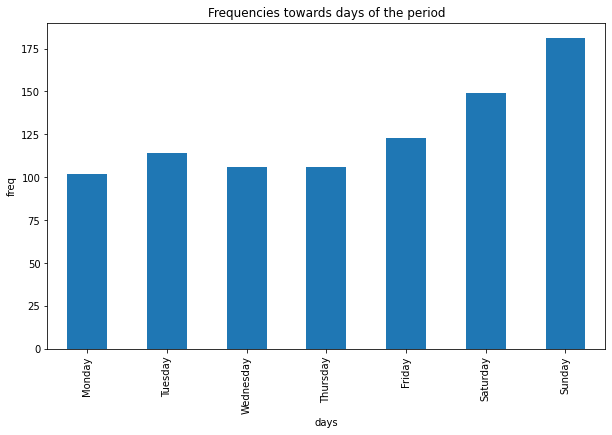

In [46]:
# Data grouping based on days of the period.

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plot1 = df.groupby(['days']).size().reindex(days).plot(kind='bar', figsize = (10,6), ylabel='freq', 
                                                       title='Frequencies towards days of the period')
plot1.figure.savefig('../img/freq-over-days.jpg')

In [47]:
df.groupby(['days']).size().reindex(days)

days
Monday       102
Tuesday      114
Wednesday    106
Thursday     106
Friday       123
Saturday     149
Sunday       181
dtype: int64

### terlihat frekuensi order paling banyak terjadi di hari libur dan sehari sebelum libur (jumat), which is obvious ^^

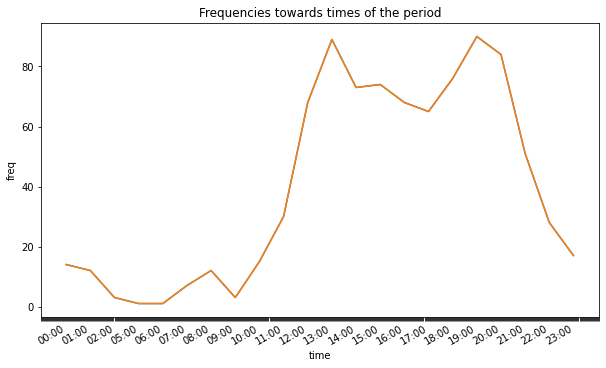

In [48]:
# Data grouping based on time of the period. (cumulative)

fig, ax = plt.subplots()
hours = mdates.HourLocator(interval = 1)

hm = df.groupby(['time']).size()

ax.plot(hm.index, hm.values)
hm.plot(ax = ax, x_compat=True, figsize = (10,6), ylabel='freq', 
        title='Frequencies towards times of the period')
ax.xaxis.set_major_locator(hours)

fig.autofmt_xdate()
fig.savefig('../img/freq-over-cumtimes.jpg')

In [49]:
hm = df.groupby(['time']).size()
hm.head(10)

time
00:00    14
01:00    12
02:00     3
05:00     1
06:00     1
07:00     7
08:00    12
09:00     3
10:00    15
11:00    30
dtype: int64

### terlihat ada gap pada jam 2-5 pagi, mengisyaratkan bahwa pengguna tidak dapat membuat order makanan pada waktu tersebut dikarenakan server berada dalam keadaan downtime (semacam waktu tidur server).

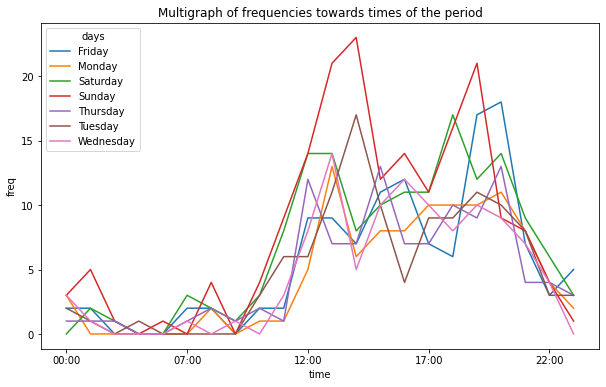

In [50]:
# Data grouping based on time of the days of the period.

group_days = df.groupby(['days', 'time']).size().unstack(level=0, fill_value=0)
plot3 = group_days.plot(figsize=(10,6), ylabel='freq',
                title='Multigraph of frequencies towards times of the period')
                
plot3.figure.savefig('../img/freq-over-times-multi.jpg')

In [51]:
df.groupby(['days', 'time']).size().idxmax()

('Sunday', '14:00')

### terlihat frekuensi order paling banyak terjadi saat jam makan siang, dan jam pulang kantor.

<ipython-input-52-5ce8a84cfc78>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(days)


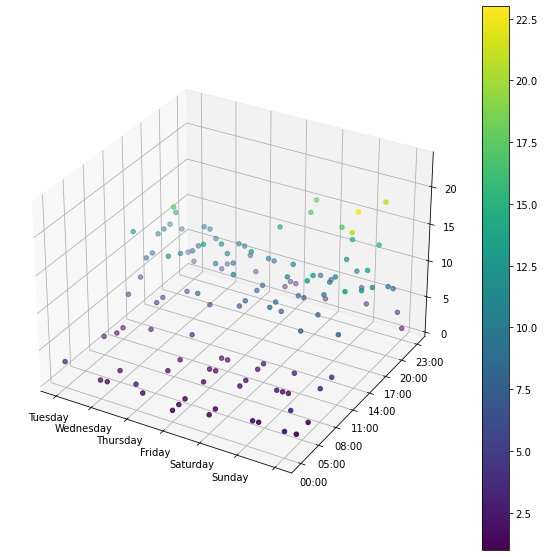

In [52]:
# Data visualization in 3d with frequencies as z.

fig = plt.figure('scatter dates', figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

grp_days = df.groupby(['days', 'time'], as_index=False).size()
time = grp_days['time'].unique()
time.sort()

grp_days['time'] = grp_days['time'].replace(time, [i for i in range(len(time))])
grp_days['days'] = grp_days['days'].replace(days, [i for i in range(len(days))])

x = grp_days['days']
y = grp_days['time']
z = grp_days['size']

plot = ax.scatter(x, y, z, c=z)
fig.colorbar(plot)

ax.xaxis.set_ticklabels(days)
ax.set_yticks([i for i in range(0,len(time),3)])
ax.yaxis.set_ticklabels([time[i] for i in range(0,len(time),3)])

plt.show()

In [53]:
grp = df.groupby(['days', 'time']).size()
print('Maximum frequencies occured in %s at %s for %i occurences' % (grp.idxmax()[0], grp.idxmax()[1], grp.max()))


Maximum frequencies occured in Sunday at 14:00 for 23 occurences


### Dari sini dapat disimpulkan bahwa, frekuensi order paling banyak terjadi pada hari minggu pukul 2 siang sebanyak 23 orderan.